# <center> TSWD Final Project </center>
### <center>Online Job Postings</center>
**<center>Kushaagra Shrivastava </center>**
**<center>PES2UG21CS917</center>**

##### Import Statements

In [1]:
import pandas as pd
import numpy as np
import re
import ydata_profiling

##### Shape of Dataset

In [2]:
original_df = pd.read_excel('InputData\job_postings_input_dataset.xlsx')
print(f'Shape of Original DataFrame: {original_df.shape}')

Shape of Original DataFrame: (19001, 24)


### `Original Dataset Display`

In [3]:
original_df.head()

jobpost          date  \
0  AMERIA Investment Consulting Company_x000D_\nJ...   Jan 5, 2004   
1  International Research & Exchanges Board (IREX...   Jan 7, 2004   
2  Caucasus Environmental NGO Network (CENN)_x000...   Jan 7, 2004   
3  Manoff Group_x000D_\nJOB TITLE:  BCC Specialis...   Jan 7, 2004   
4  Yerevan Brandy Company_x000D_\nJOB TITLE:  Sof...  Jan 10, 2004   

                                               Title  \
0                            Chief Financial Officer   
1  Full-time Community Connections Intern (paid i...   
2                                Country Coordinator   
3                                     BCC Specialist   
4                                 Software Developer   

                                           Company AnnouncementCode Term  \
0             AMERIA Investment Consulting Company              NaN  NaN   
1  International Research & Exchanges Board (IREX)              NaN  NaN   
2        Caucasus Environmental NGO Network (CENN)              NaN  NaN   
3                                     Manoff Group              NaN  NaN   
4                           Yerevan Brandy Company              NaN  NaN   

  Eligibility Audience StartDate                                    Duration  \
0         NaN      NaN       NaN                                         NaN   
1         NaN      NaN       NaN                                    3 months   
2         NaN      NaN       NaN  Renewable annual contract_x000D_\nPOSITION   
3         NaN      NaN       NaN                                         NaN   
4         NaN      NaN       NaN                                         NaN   

   ... Salary                                       ApplicationP OpeningDate  \
0  ...    NaN  To apply for this position, please submit a_x0...         NaN   
1  ...    NaN  Please submit a cover letter and resume to:_x0...         NaN   
2  ...    NaN  Please send resume or CV toursula.kazarian@......         NaN   
3  ...    NaN  Please send cover letter and resume to Amy_x00...         NaN   
4  ...    NaN  Successful candidates should submit_x000D_\n- ...         NaN   

                                            Deadline Notes  \
0                                2004-01-26 00:00:00   NaN   
1                                2004-01-12 00:00:00   NaN   
2  20 January 2004_x000D_\nSTART DATE:  February ...   NaN   
3     23 January 2004_x000D_\nSTART DATE:  Immediate   NaN   
4                             20 January 2004, 18:00   NaN   

                                              AboutC Attach  Year Month     IT  
0                                                NaN    NaN  2004     1  False  
1  The International Research & Exchanges Board (...    NaN  2004     1  False  
2  The Caucasus Environmental NGO Network is a_x0...    NaN  2004     1  False  
3                                                NaN    NaN  2004     1  False  
4                                                NaN    NaN  2004     1   True  

[5 rows x 24 columns]

##### Null Values

In [4]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16474 non-null  object
 13  RequiredQual      18510 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

##### Missing values

In [5]:
print(original_df.isnull().sum())

jobpost                 0
date                    0
Title                  28
Company                 7
AnnouncementCode    17793
Term                11325
Eligibility         14071
Audience            18361
StartDate            9326
Duration             8203
Location               32
JobDescription       3892
JobRequirment        2527
RequiredQual          491
Salary               9379
ApplicationP           60
OpeningDate           706
Deadline               65
Notes               16790
AboutC               6531
Attach              17442
Year                    0
Month                   0
IT                      0
dtype: int64


#### Pandas Profiling Report - `Original Dataset`

In [6]:
ydata_profiling.ProfileReport(original_df,minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## <center>Conclude Operations on Original Dataset</center>

##### Removing Useless Columns

In [7]:
columns_to_drop = ['jobpost', 'AnnouncementCode', 'Company', 'Term', 'OpeningDate', 'Eligibility', 'Notes', 'Audience', 'ApplicationP', 'Location', 'AboutC', 'Attach']
working_df = original_df.drop(columns_to_drop, axis=1)
working_df.head()

date                                              Title StartDate  \
0   Jan 5, 2004                            Chief Financial Officer       NaN   
1   Jan 7, 2004  Full-time Community Connections Intern (paid i...       NaN   
2   Jan 7, 2004                                Country Coordinator       NaN   
3   Jan 7, 2004                                     BCC Specialist       NaN   
4  Jan 10, 2004                                 Software Developer       NaN   

                                     Duration  \
0                                         NaN   
1                                    3 months   
2  Renewable annual contract_x000D_\nPOSITION   
3                                         NaN   
4                                         NaN   

                                      JobDescription  \
0  AMERIA Investment Consulting Company is seekin...   
1                                                NaN   
2  Public outreach and strengthening of a growing...   
3  The LEAD (Local Enhancement and Development fo...   
4                                                NaN   

                                       JobRequirment  \
0  - Supervises financial management and administ...   
1                                                NaN   
2  - Working with the Country Director to provide...   
3  - Identify gaps in knowledge and overseeing in...   
4  - Rendering technical assistance to Database M...   

                                        RequiredQual Salary  \
0  To perform this job successfully, an_x000D_\ni...    NaN   
1  - Bachelor's Degree; Master's is preferred;_x0...    NaN   
2  - Degree in environmentally related field, or ...    NaN   
3  - Advanced degree in public health, social sci...    NaN   
4  - University degree; economical background is ...    NaN   

                                            Deadline  Year  Month     IT  
0                                2004-01-26 00:00:00  2004      1  False  
1                                2004-01-12 00:00:00  2004      1  False  
2  20 January 2004_x000D_\nSTART DATE:  February ...  2004      1  False  
3     23 January 2004_x000D_\nSTART DATE:  Immediate  2004      1  False  
4                             20 January 2004, 18:00  2004      1   True

##### Checking What Qualifications are Required

In [8]:
working_df['Required Degree'] = working_df['RequiredQual'].str.contains('degree', case=False)
working_df['Required Masters'] = working_df['RequiredQual'].str.contains('Higher Education|Master', case = False)
working_df['Required Experience'] = working_df['RequiredQual'].str.contains('Experience', case = False)
working_df['Required Female'] = working_df['RequiredQual'].str.contains('female|woman', case=False)

selected_columns = ['Required Degree', 'Required Masters', 'Required Experience', 'Required Female']
working_df[selected_columns].head()

Required Degree Required Masters Required Experience Required Female
0            True             True                True           False
1            True             True                True           False
2            True            False                True           False
3            True            False                True           False
4            True            False                True           False

##### Checking What Roles are Being Offered

In [9]:
working_df['Management'] = working_df['Title'].str.contains('Manager|Managing|Management|Coordinator|Project|Head', case=False)
working_df['Finance'] = working_df['Title'].str.contains('Finance|Sales|Financial|Accountant|Account', case=False)
working_df['Intern'] = working_df['Title'].str.contains('Intern|Internship', case=False)
selected_columns = ['Title', 'IT', 'Management', 'Finance', 'Intern']
working_df[selected_columns].head()

Title     IT Management  \
0                            Chief Financial Officer  False      False   
1  Full-time Community Connections Intern (paid i...  False      False   
2                                Country Coordinator  False       True   
3                                     BCC Specialist  False      False   
4                                 Software Developer   True      False   

  Finance Intern  
0    True  False  
1   False   True  
2   False  False  
3   False  False  
4   False  False

##### Getting the Transparency of the Job Posting

In [10]:
working_df['StartDateGiven'] = working_df['StartDate'].notnull()
working_df['DurationGiven'] = working_df['Duration'].notnull()
working_df['JobDescriptionGiven'] = working_df['JobDescription'].notnull()
working_df['JobRequirmentGiven'] = working_df['JobRequirment'].notnull()
working_df['SalaryGiven'] = working_df['Salary'].notnull()

working_df['Transparency Score'] = working_df[['StartDateGiven', 'SalaryGiven', 'DurationGiven', 'JobDescriptionGiven', 'JobRequirmentGiven']].sum(axis=1)
selected_columns = ['StartDateGiven', 'SalaryGiven', 'DurationGiven', 'JobDescriptionGiven', 'JobRequirmentGiven', 'Transparency Score']
working_df[selected_columns].head(10)

StartDateGiven  SalaryGiven  DurationGiven  JobDescriptionGiven  \
0           False        False          False                 True   
1           False        False           True                False   
2           False        False           True                 True   
3           False        False          False                 True   
4           False        False          False                False   
5           False        False          False                 True   
6           False        False          False                 True   
7           False        False           True                False   
8           False        False          False                False   
9           False        False          False                 True   

   JobRequirmentGiven  Transparency Score  
0                True                   2  
1               False                   1  
2                True                   3  
3                True                   2  
4                True                   1  
5               False                   1  
6               False                   1  
7               False                   1  
8                True                   1  
9               False                   1

##### Cleaning Date And Deadline to find the Number of Days Given to Apply for the Job

In [11]:
def extract_date(row):
    match_datetime = re.search(r'\b\d{4}-\d{2}-\d{2}\b', str(row))
    if match_datetime:
        return match_datetime.group()

    match_date = re.search(r'\b\d{1,2} \w+ \d{4}\b', str(row))
    if match_date:
        return match_date.group()
    return np.nan

working_df['Deadline'] = working_df['Deadline'].apply(extract_date)
working_df['Deadline Intermediate 1'] = pd.to_datetime(working_df['Deadline'], errors='coerce')
working_df['Deadline Intermediate 2'] = pd.to_datetime(working_df['Deadline'], format='%d %B %Y', errors='coerce')

working_df['Deadline'] = pd.to_datetime(working_df['Deadline Intermediate 1']).combine_first(pd.to_datetime(working_df['Deadline Intermediate 2']))
working_df['date'] = pd.to_datetime(working_df['date'], format='%b %d, %Y', errors='coerce')
working_df['Days To Apply'] = (working_df['Deadline'] - working_df['date']).dt.days

selected_columns = ['date', 'Deadline', 'Deadline Intermediate 1', 'Deadline Intermediate 2', 'Days To Apply']
working_df[selected_columns].head()


date   Deadline Deadline Intermediate 1 Deadline Intermediate 2  \
0 2004-01-05 2004-01-26              2004-01-26                     NaT   
1 2004-01-07 2004-01-12              2004-01-12                     NaT   
2 2004-01-07        NaT                     NaT                     NaT   
3 2004-01-07        NaT                     NaT                     NaT   
4 2004-01-10 2004-01-20                     NaT              2004-01-20   

   Days To Apply  
0           21.0  
1            5.0  
2            NaN  
3            NaN  
4           10.0

##### Number of Job Postings Per Year & Month

In [12]:
jobs_per_month = dict(working_df['Month'].value_counts())
jobs_per_year = dict(working_df['Year'].value_counts())
print(f'Jobs Yearwise:\n{jobs_per_year}\n\nJobs Monthwise:\n{jobs_per_month}')
jobs_over_time_df = working_df.groupby(['Month', 'Year']).size().reset_index(name='Number_of_Jobs_Posted')
jobs_over_time_df.head()

Jobs Yearwise:
{2012: 2149, 2013: 2009, 2015: 2009, 2014: 1983, 2008: 1785, 2011: 1697, 2007: 1538, 2010: 1511, 2009: 1191, 2005: 1138, 2006: 1116, 2004: 875}

Jobs Monthwise:
{3: 1702, 2: 1665, 6: 1662, 9: 1652, 10: 1637, 8: 1613, 7: 1595, 5: 1580, 11: 1573, 4: 1466, 12: 1432, 1: 1424}


Month  Year  Number_of_Jobs_Posted
0      1  2004                     40
1      1  2005                     99
2      1  2006                     74
3      1  2007                    118
4      1  2008                    138

##### Dropping all other Intermediate Columns

In [13]:
columns_to_drop = ['Year',
                   'Month',
                   'date',
                   'Deadline',
                   'RequiredQual',
                   'JobDescription',
                   'JobRequirment',
                   'StartDate',
                   'Duration',
                   'Title',
                   'Salary',
                   'Deadline Intermediate 1',
                   'Deadline Intermediate 2',
                   'StartDateGiven',
                   'SalaryGiven',
                   'DurationGiven',
                   'JobDescriptionGiven',
                   'JobRequirmentGiven']
final_df = working_df.drop(columns_to_drop, axis=1)
final_df.head()

IT Required Degree Required Masters Required Experience Required Female  \
0  False            True             True                True           False   
1  False            True             True                True           False   
2  False            True            False                True           False   
3  False            True            False                True           False   
4   True            True            False                True           False   

  Management Finance Intern  Transparency Score  Days To Apply  
0      False    True  False                   2           21.0  
1      False   False   True                   1            5.0  
2       True   False  False                   3            NaN  
3      False   False  False                   2            NaN  
4      False   False  False                   1           10.0

### Getting Other Derived Datasets

In [14]:
boolean_cols = final_df.iloc[:, :8]
column_counts = boolean_cols.sum(axis=0)
column_counts_df = pd.DataFrame({'Column': column_counts.index,
                          'True_Count': column_counts.values,
                          'Percentage': column_counts.values / len(boolean_cols) * 100})
print(f'Column Counts DataFrame:\n{column_counts_df}')

Column Counts DataFrame:
                Column True_Count Percentage
0                   IT       3759  19.783169
1      Required Degree      10003  52.644598
2     Required Masters       5174  27.230146
3  Required Experience      16194  85.227093
4      Required Female          7    0.03684
5           Management       4229  22.256723
6              Finance       2493  13.120362
7               Intern        500    2.63144


In [15]:
count_transparency_score = final_df['Transparency Score'].value_counts().to_dict()
print(f'Count of Transparency Score:\n{count_transparency_score}')

Count of Transparency Score:
{4: 4840, 3: 4656, 2: 3895, 5: 3790, 1: 1610, 0: 210}


In [16]:
bin_size = 7
days_to_apply = final_df['Days To Apply'][~final_df['Days To Apply'].isna()]
bins = range(0, 70 + bin_size, bin_size)
count_days_to_apply = pd.cut(days_to_apply, bins=bins, include_lowest=True).value_counts(sort=False).to_dict()
print(f'Count of Days To Apply:\n{count_days_to_apply}')

Count of Days To Apply:
{Interval(-0.001, 7.0, closed='right'): 1370, Interval(7.0, 14.0, closed='right'): 4808, Interval(14.0, 21.0, closed='right'): 2946, Interval(21.0, 28.0, closed='right'): 1664, Interval(28.0, 35.0, closed='right'): 5119, Interval(35.0, 42.0, closed='right'): 50, Interval(42.0, 49.0, closed='right'): 27, Interval(49.0, 56.0, closed='right'): 10, Interval(56.0, 63.0, closed='right'): 19, Interval(63.0, 70.0, closed='right'): 4}


#### `Removing Outlier and Handling Missing Values`

In [17]:
def replace_outliers_with_nan(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dataframe[column] = dataframe[column].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)

    return dataframe

final_df = replace_outliers_with_nan(final_df, 'Days To Apply')
final_df['Days To Apply'].fillna(np.nan)

for column in final_df.columns:
    if column != 'Days To Apply':
        final_df[column] = final_df[column].fillna(False)

final_df.head()

IT  Required Degree  Required Masters  Required Experience  \
0  False             True              True                 True   
1  False             True              True                 True   
2  False             True             False                 True   
3  False             True             False                 True   
4   True             True             False                 True   

   Required Female  Management  Finance  Intern  Transparency Score  \
0            False       False     True   False                   2   
1            False       False    False    True                   1   
2            False        True    False   False                   3   
3            False       False    False   False                   2   
4            False       False    False   False                   1   

   Days To Apply  
0           21.0  
1            5.0  
2            NaN  
3            NaN  
4           10.0

##### Shape of Final Dataset & Dates Through Time Dataset

In [18]:
print(f'Shapes of:\nFinal DataFrame:{final_df.shape}\nJobs Through Time DataFrame:{jobs_over_time_df.shape}')

Shapes of:
Final DataFrame:(19001, 10)
Jobs Through Time DataFrame:(144, 3)


### Pandas Profile Report - `Final Dataset`

In [19]:
ydata_profiling.ProfileReport(final_df,minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Pandas Profile Report - `Jobs in Time Dataset`

In [20]:
ydata_profiling.ProfileReport(jobs_over_time_df,minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Pandas Profile Report - `Counts Dataset`

In [21]:
ydata_profiling.ProfileReport(column_counts_df,minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## <center>Saving the Files<center>

In [22]:
final_df.to_excel(r'OutputData\final.xlsx', index=False)
jobs_over_time_df.to_excel('OutputData\jobs_over_time.xlsx', index = False)
column_counts_df.to_excel('OutputData\column_counts.xlsx', index=False)
final_df.to_csv(r'OutputData\final_csv.csv', index=False)
jobs_over_time_df.to_csv('OutputData\jobs_over_time_csv.csv', index = False)
column_counts_df.to_csv('OutputData\column_counts_csv.csv', index=False)
print(f'DataFrames saved')

DataFrames saved


### `Plots` - Jobs Over Time

##### Importing For Plotting

In [23]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline

##### Jobs Over Time

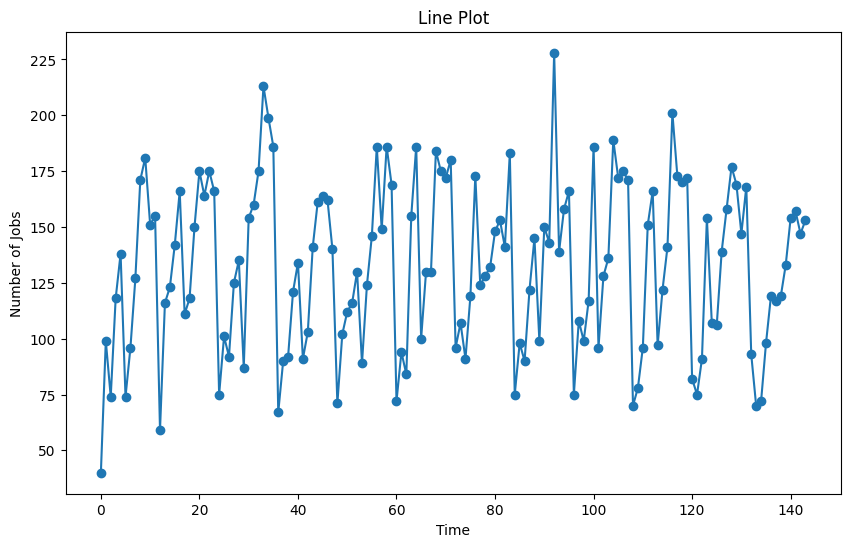

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(jobs_over_time_df['Number_of_Jobs_Posted'], marker='o')
plt.title('Line Plot')
plt.xlabel('Time')
plt.ylabel('Number of Jobs')
plt.show()

##### Jobs Over Different Months

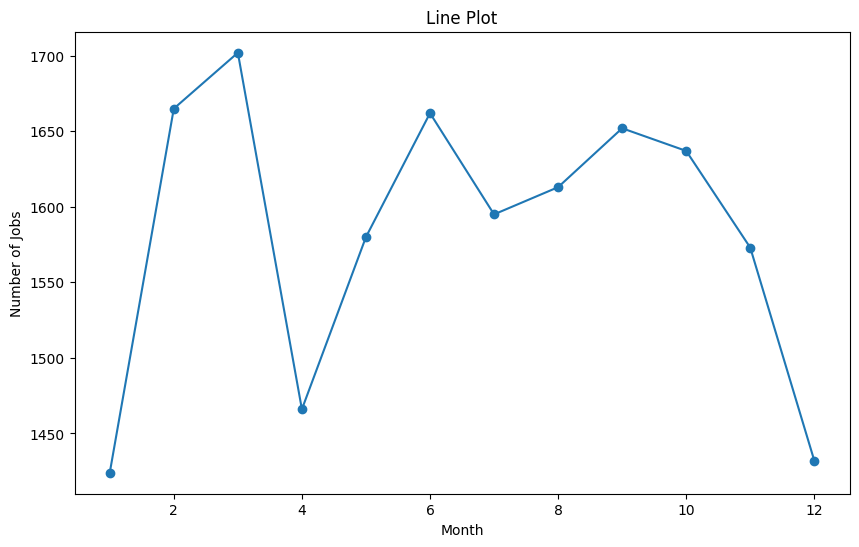

In [25]:
jobs_per_month = {k: v for k, v in sorted(jobs_per_month.items())}
plt.figure(figsize=(10, 6))
plt.plot(jobs_per_month.keys(), jobs_per_month.values(), marker='o')
plt.title('Line Plot')
plt.xlabel('Month')
plt.ylabel('Number of Jobs')
plt.show()

##### Jobs Over Year

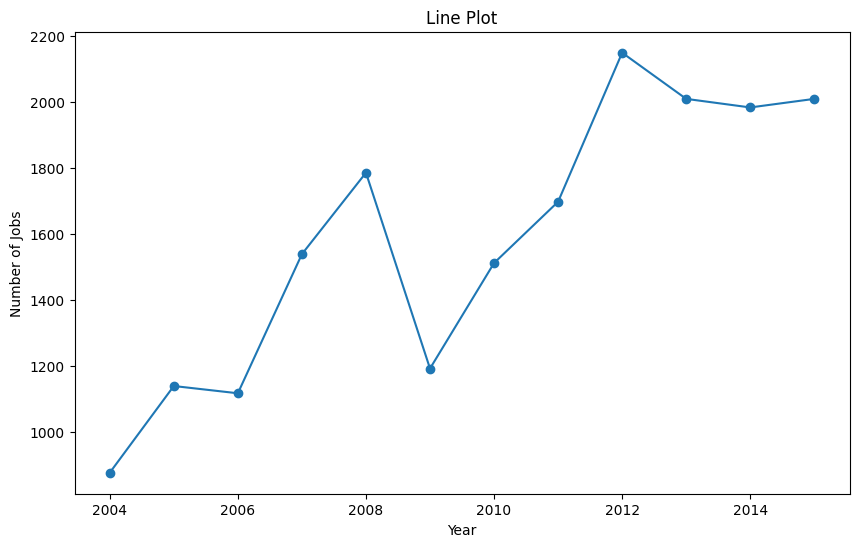

In [26]:
jobs_per_year = {k: v for k, v in sorted(jobs_per_year.items())}
plt.figure(figsize=(10, 6))
plt.plot(jobs_per_year.keys(), jobs_per_year.values(), marker='o')
plt.title('Line Plot')
plt.xlabel('Year')
plt.ylabel('Number of Jobs')
plt.show()